<a href="https://colab.research.google.com/github/Scodingcurriculum/Artificial-Intelligence-C56/blob/main/L18(Licence_Plate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless

In [ ]:
!pip install easyocr

  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 23.3 MB/s eta 0:00:00
Using cached packaging-24.1-py3-none-any.whl (53 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.
google-cloud-aiplatform 1.67.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you

License plate number: 
Detected text: KIA (Probability: 1.00)
Detected text: IND (Probability: 1.00)


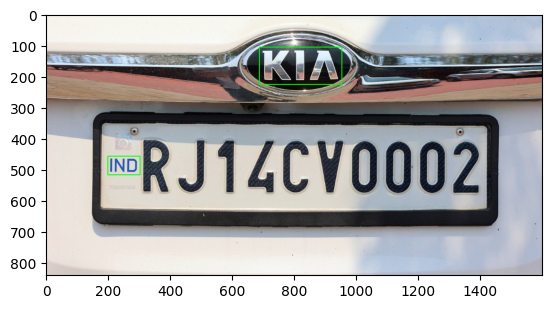

In [ ]:
#!pip install opencv-python-headless easyocr

import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import re

# Load the image
image_path = 'image.jpg'
image = cv2.imread(image_path)

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Detect the license plate
detections = reader.readtext(image)

# Filter and extract license plate text
license_plate_text = None
for (bbox, text, prob) in detections:
    if prob > 0.5:  # Adjust the probability threshold if needed
        # Assuming the license plate text is in uppercase and contains alphanumeric characters
        if text.isupper() and any(char.isalnum() for char in text):
            license_plate_text = text
            break  # Stop after finding a potential license plate text

# Extract numbers from license plate text using regular expressions
if license_plate_text:
    license_plate_number = re.sub(r'\D', '', license_plate_text)  # Remove non-digit characters
    print(f'License plate number: {license_plate_number}')
else:
    print('License plate number not found.')

# Draw bounding boxes and display the results
for (bbox, text, prob) in detections:
    # Filter out detections with low probability
    if prob > 0.5:
        # Get the coordinates of the bounding box
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))

        # Draw the bounding box on the image
        cv2.rectangle(image, tl, br, (0, 255, 0), 2)

        # Display the detected text
        print(f'Detected text: {text} (Probability: {prob:.2f})')

# Display the image with the detected license plate
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()